# GHOST - 1D linear advection equation
Solving the periodic 1D linear advection equation with a sinusoidal initial condition

In [1]:
%matplotlib inline
import sys  
import numpy as np
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Solver import Solver

# read in a uniform mesh with M elements
M = 4
mesh = Mesh1D("advection_1D", 0.0, 1.0, M)

# define boundaries
left = np.array([1.0,0.0]) 
right = np.array([1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right],[1,2])

# define periodicity
mesh.make_periodic((1,2)) 

# set polynomial degree of discretization
p = 3

# set wave speed
a = 1.0

Set up solver parameters defining a weak-form modal DG scheme for the linear advection equation with RK4 time-marching and an upwind numerical flux

In [2]:
params = {  "project_title": "advection_1D",
        "problem": "constant_advection",
        "initial_condition": "sine",
        "wavelength": np.ones(1),
        "wave_speed": np.array([a]),
        "upwind_parameter": 1.0,
        "volume_rule": "lgl",
        "integration_type": "quadrature",
        "solution_degree": p,
        "volume_quadrature_degree": 2*p+1,
        "solution_representation": "modal",
        "form": "weak",
        "correction": "c_dg",
        "time_integrator": "rk44",
        "final_time": 1.0,
        "time_step_scale": 0.1}

Create a `Solver` object with the parameters and mesh defined above

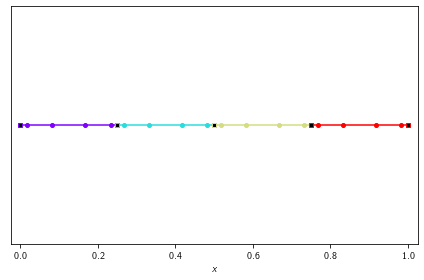

In [3]:
advection_solver = Solver(params,mesh,h=1.0/M)
advection_solver.discretization.plot()

Run `advection_solver` for one period

In [4]:
advection_solver.run(restart=False)

Post-process and generate plots of numerical and exact solutions

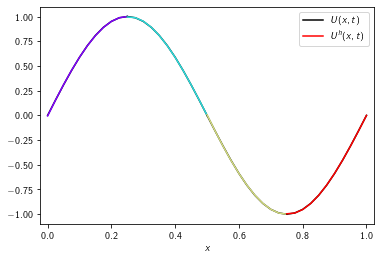

In [5]:
advection_solver.post_process(error_quadrature_degree=2*p+1)
advection_solver.plot(plot_exact=True)

In [6]:
advection_solver.calculate_error()

array([0.00096922])